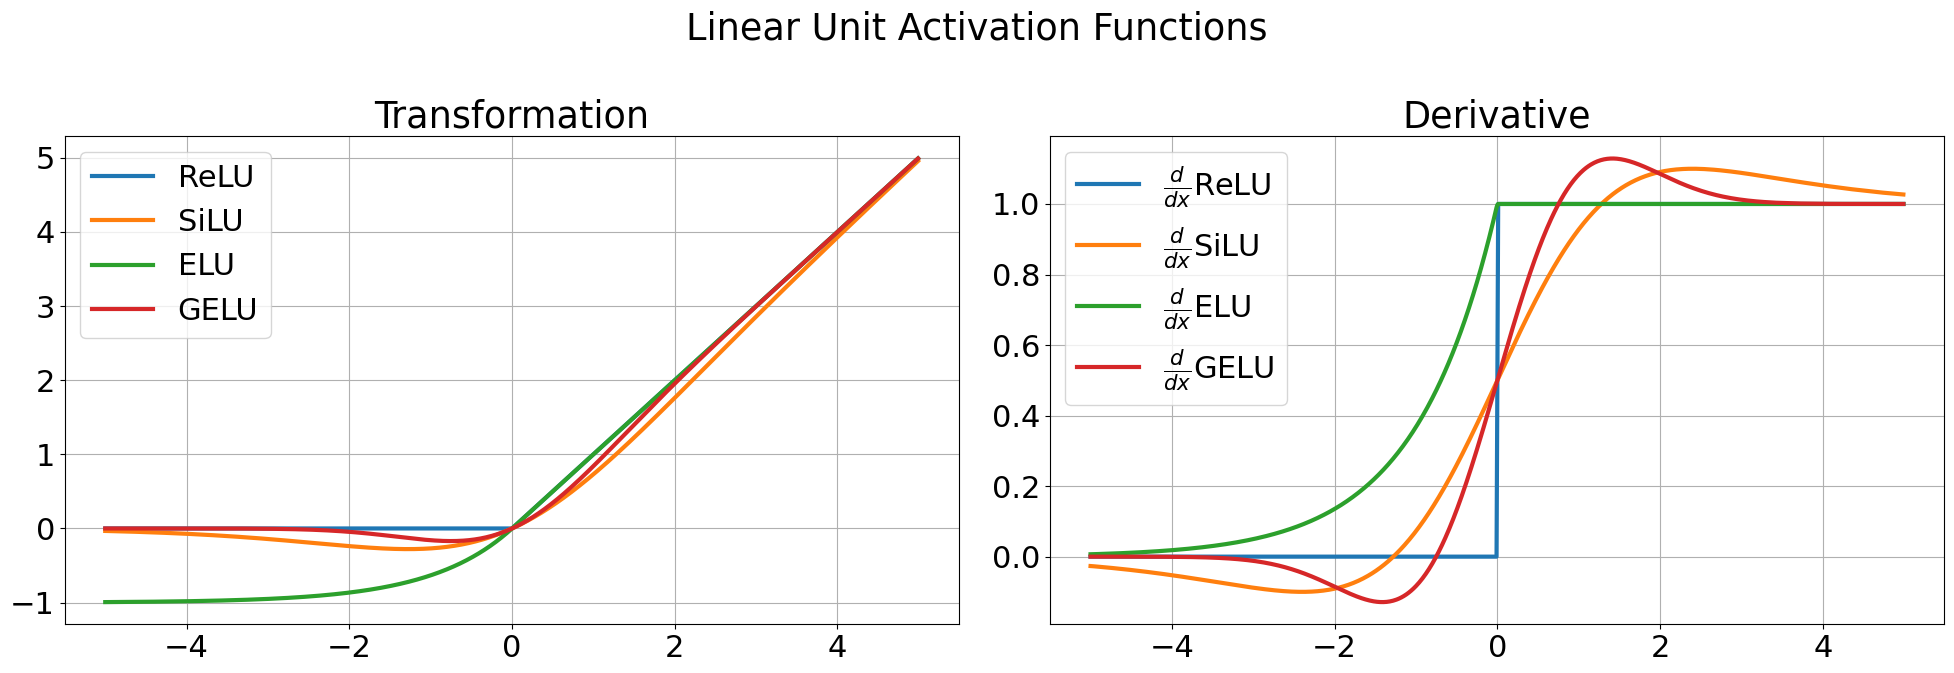

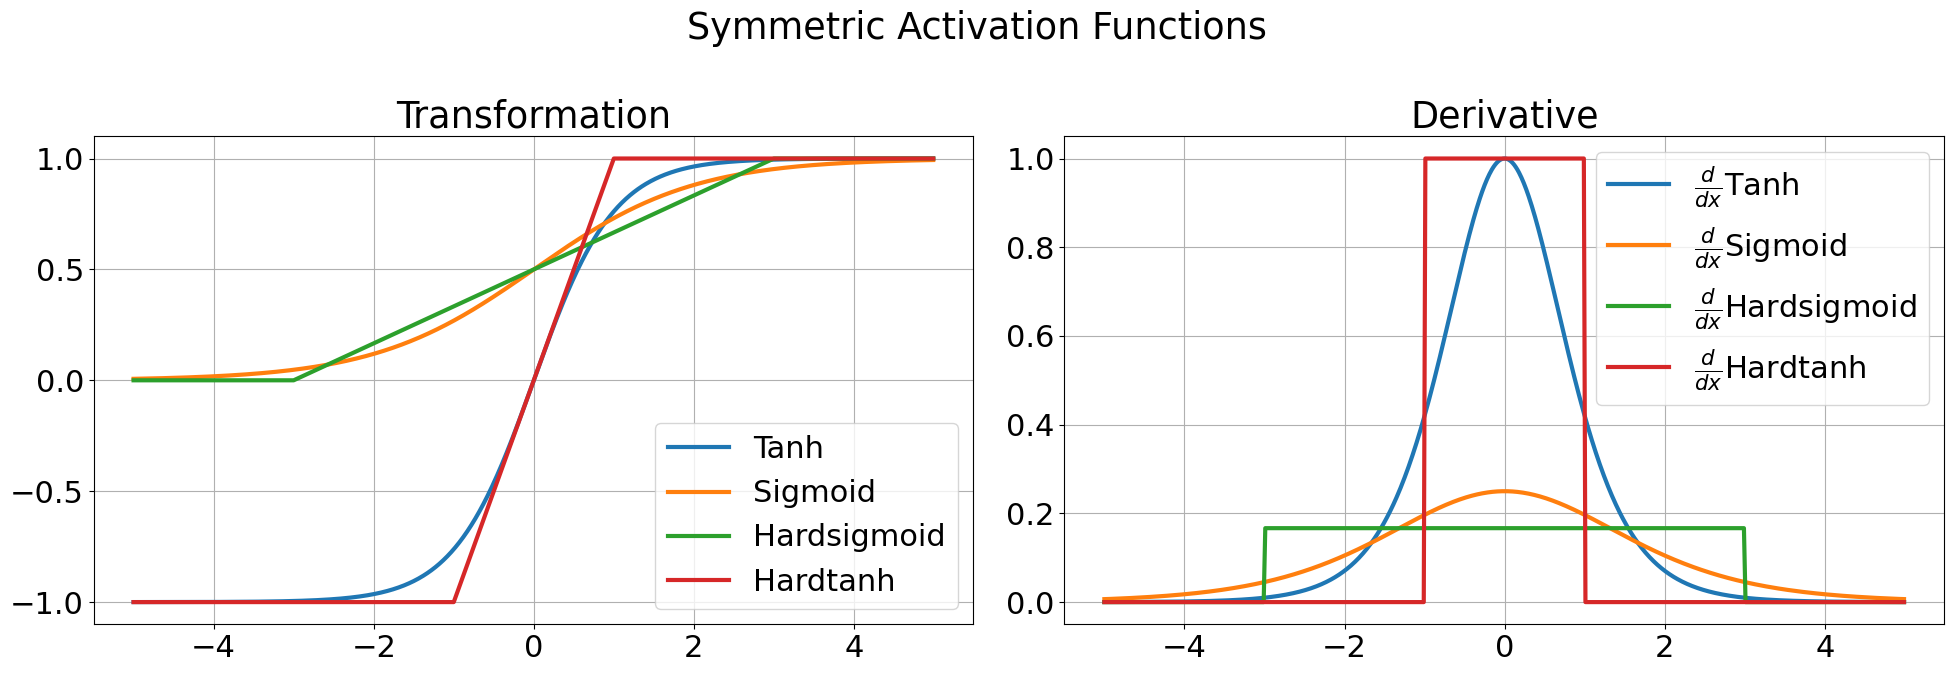

In [33]:
import torch.nn as nn
import torch
import os
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 22})
linewidth = 3
step = 1e-2

lu_act_functions = [
    nn.ReLU(),
    nn.SiLU(),
    nn.ELU(),
    nn.GELU(),
]

sym_act_functions = [nn.Tanh(), nn.Sigmoid(), nn.Hardsigmoid(), nn.Hardtanh()]

x = torch.arange(start=-5, end=5, step=step)

fig, axs = plt.subplots(1, 2, figsize=(20, 7))
for act in lu_act_functions:
    y = act(x)
    dy = torch.gradient(y, spacing=step)[0]

    axs[0].plot(x, y, linewidth=linewidth, label=act._get_name())
    axs[1].plot(x, dy, linewidth=linewidth, label="$\\frac{d}{dx}$" f"{act._get_name()}")


axs[0].legend()
axs[1].legend()
axs[0].grid()
axs[1].grid()

axs[0].set_title("Transformation")
axs[1].set_title("Derivative")
plt.suptitle("Linear Unit Activation Functions")
plt.savefig(os.path.join("figures", "lu_activation_functions.png"))
plt.tight_layout()
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(20, 7))
for act in sym_act_functions:
    y = act(x)
    dy = torch.gradient(y, spacing=step)[0]

    axs[0].plot(x, y, linewidth=linewidth, label=act._get_name())
    axs[1].plot(x, dy, linewidth=linewidth, label="$\\frac{d}{dx}$" f"{act._get_name()}")

axs[0].legend()
axs[1].legend()
axs[0].grid()
axs[1].grid()

axs[0].set_title("Transformation")
axs[1].set_title("Derivative")
plt.suptitle("Symmetric Activation Functions")
plt.savefig(os.path.join("figures", "symmetric_activation_functions.png"))
plt.tight_layout()
plt.show()

In [34]:
for act in [*lu_act_functions, *sym_act_functions]:
    y = act(x)

    plt.figure(figsize=(7, 7))

    plt.plot(x, y, linewidth=linewidth, label=act._get_name())
    plt.legend()
    plt.grid()
    plt.suptitle(f"{act._get_name()} Activation Functions")
    plt.savefig(os.path.join("figures", f"{act._get_name()}_activation_functions.png"))
    plt.tight_layout()
    # plt.show()
    plt.close()